<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/04-Agrupamiento-kMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Agrupamiento k-Means
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de agrupamiento jerárquico a un conjunto de datos.

Los paquetes necesarios son:

In [27]:
# Paquetes necesarios
import pandas as pd  # Manejo de datos
import numpy as np  # Operaciones matemáticas y arreglos
import matplotlib.pyplot as plt  # Visualización
import plotly.express as px # Para visualización interactiva
from sklearn.preprocessing import StandardScaler  # Estandarización de datos
from sklearn.datasets import make_blobs # Creación de datos de prueba
from sklearn.cluster import KMeans  # Algoritmo K-means
from sklearn.decomposition import PCA # Análisis de componentes principales
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score


---
## <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [10]:
# Leer los datos
data = pd.read_csv('https://raw.githubusercontent.com/SebastianJaramilloo/Tareas_Aprendizaje_Automatico-/main/data/players_21.csv')

# Columnas seleccionadas en clase
numeric_cols = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

data = data[['short_name', *numeric_cols]]

# Mostrar algunos datos
display(data.head())

,short_name,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,85.0,92.0,91.0,95.0,38.0,65.0
1,Cristiano Ronaldo,89.0,93.0,81.0,89.0,35.0,77.0
2,J. Oblak,NaN,NaN,NaN,NaN,NaN,NaN
3,R. Lewandowski,78.0,91.0,78.0,85.0,43.0,82.0
4,Neymar Jr,91.0,85.0,86.0,94.0,36.0,59.0


In [11]:
# Descripción de los datos
data.describe()

,pace,shooting,passing,dribbling,defending,physic
count,16861.000000,16861.000000,16861.000000,16861.000000,16861.000000,16861.000000
mean,67.668110,52.274954,57.139434,62.455430,51.316292,64.458988
std,10.984862,13.991421,10.273655,10.048706,16.405179,9.746706
min,25.000000,16.000000,25.000000,25.000000,15.000000,28.000000
25%,62.000000,42.000000,50.000000,57.000000,36.000000,58.000000
50%,68.000000,54.000000,58.000000,64.000000,56.000000,66.000000
75%,75.000000,63.000000,64.000000,69.000000,64.000000,72.000000
max,96.000000,93.000000,93.000000,95.000000,91.000000,91.000000


In [12]:
# Limpieza de datos
data = data.dropna().reset_index(drop=True)

In [13]:
# Escalado
scaler = StandardScaler()
X = scaler.fit_transform(data.iloc[:, 1:])

---
## <font color='264CC7'> Determinación del número de clusters </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de clústeres para un modelo K-Means utilizando el método del codo.
<ul>
  <li>Genera una gráfica que muestre la inercia frente al número de clústeres (k) en el rango de 1 a 10.</li>
  <li>Identifica visualmente el "codo" en la curva para seleccionar el número óptimo de clústeres.</li>
  <li>De manera intuitiva, explica por qué consideras ese punto como el codo y cómo influye en la calidad de los clústeres.</li>
</ul>
</div>


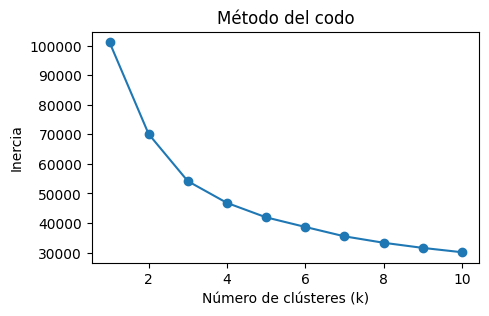

In [14]:
# Método del codo
inertia = []

for i in range(1, 11):
    modelo = KMeans(n_clusters=i, random_state=42)
    modelo.fit(X)
    inertia.append(modelo.inertia_)

plt.figure(figsize=(5, 3))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()

En la gráfica del método del codo se observa que la inercia disminuye de forma pronunciada al aumentar el número de clústeres hasta cierto punto, a partir del cual la mejora comienza a ser cada vez menor y la curva se aplana. Elegir ese número de clústeres permite obtener grupos compactos y bien definidos sin introducir un número innecesario de clústeres que no aportan

---
## <font color='264CC7'> Asignación de grupos y análisis </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza un análisis de los grupos obtenidos.
<ul>
  <li>Asigna los grupos.</li>
  <li>Revisa la media de cada grupo.</li>
  <li>Revisa el mínimo y máximo de cada grupo.</li>
  <li>Muestra algunos integrantes de cada grupo.</li>
</ul>
</div>

In [15]:
# Agrupamiento K-Means
modelo = KMeans(n_clusters=6, random_state=42)
modelo.fit(X)

labels = modelo.labels_

data['Cluster'] = ['C' + str(c) for c in labels]

display(data.head())

,short_name,pace,shooting,passing,dribbling,defending,physic,Cluster
0,L. Messi,85.0,92.0,91.0,95.0,38.0,65.0,C5
1,Cristiano Ronaldo,89.0,93.0,81.0,89.0,35.0,77.0,C5
2,R. Lewandowski,78.0,91.0,78.0,85.0,43.0,82.0,C2
3,Neymar Jr,91.0,85.0,86.0,94.0,36.0,59.0,C5
4,K. De Bruyne,76.0,86.0,93.0,88.0,64.0,78.0,C2


In [16]:
# Cantidad de elementos por clúster
data['Cluster'].value_counts()

,count
Cluster,
C1,3602
C5,3533
C3,3071
C2,2970
C4,2146
C0,1539


In [17]:
# Media de cada grupo
numeric_cols = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

data.groupby('Cluster')[numeric_cols].mean()

,pace,shooting,passing,dribbling,defending,physic
Cluster,,,,,,
C0,49.925276,45.833008,55.640026,55.991553,65.453541,73.458090
C1,70.011105,44.277901,56.748195,61.504720,60.559134,65.677957
C2,69.237037,62.202694,68.907407,71.032660,65.396296,71.359933
C3,67.967112,54.782481,50.910127,60.381960,30.959948,53.234451
C4,59.185461,30.135601,41.759553,45.258155,59.607642,65.229264
C5,76.581942,66.156807,63.055477,71.278234,36.556468,62.783753


In [18]:
# Mínimo y máximo de cada grupo
data.groupby('Cluster')[numeric_cols].agg(['min', 'max'])

pace       shooting       passing       dribbling       defending  \
          min   max      min   max     min   max       min   max       min   
Cluster                                                                      
C0       28.0  69.0     17.0  81.0    35.0  76.0      35.0  72.0      21.0   
C1       51.0  95.0     23.0  65.0    38.0  71.0      47.0  75.0      28.0   
C2       30.0  96.0     36.0  91.0    53.0  93.0      55.0  92.0      30.0   
C3       25.0  93.0     26.0  76.0    30.0  74.0      43.0  80.0      15.0   
C4       29.0  89.0     16.0  55.0    25.0  59.0      25.0  62.0      24.0   
C5       44.0  96.0     46.0  93.0    41.0  91.0      57.0  95.0      17.0   

              physic        
          max    min   max  
Cluster                     
C0       90.0   46.0  89.0  
C1       89.0   43.0  91.0  
C2       91.0   49.0  91.0  
C3       66.0   28.0  81.0  
C4       79.0   40.0  87.0  
C5       67.0   37.0  90.0

In [19]:
# Algunos integrantes de cada grupo
for cluster in data['Cluster'].unique():
    print(
        f'Cluster {cluster}: cantidad de elementos '
        f'{data[data["Cluster"] == cluster].shape[0]}'
    )
    display(
        data[data['Cluster'] == cluster][
            ['short_name'] + numeric_cols
        ].head(5)
    )

Cluster C5: cantidad de elementos 3533


,short_name,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,85.0,92.0,91.0,95.0,38.0,65.0
1,Cristiano Ronaldo,89.0,93.0,81.0,89.0,35.0,77.0
3,Neymar Jr,91.0,85.0,86.0,94.0,36.0,59.0
5,K. Mbappé,96.0,86.0,78.0,91.0,39.0,76.0
7,S. Mané,94.0,85.0,80.0,90.0,44.0,76.0


Cluster C2: cantidad de elementos 2970


,short_name,pace,shooting,passing,dribbling,defending,physic
2,R. Lewandowski,78.0,91.0,78.0,85.0,43.0,82.0
4,K. De Bruyne,76.0,86.0,93.0,88.0,64.0,78.0
6,V. van Dijk,76.0,60.0,71.0,71.0,91.0,86.0
10,Sergio Ramos,71.0,70.0,76.0,73.0,88.0,85.0
12,Casemiro,65.0,73.0,76.0,72.0,86.0,91.0


Cluster C1: cantidad de elementos 3602


,short_name,pace,shooting,passing,dribbling,defending,physic
19,K. Koulibaly,75.0,28.0,55.0,68.0,89.0,86.0
58,M. Škriniar,69.0,41.0,59.0,66.0,87.0,81.0
97,S. de Vrij,68.0,41.0,62.0,68.0,86.0,75.0
124,J. Gomez,82.0,30.0,66.0,69.0,83.0,80.0
129,A. Romagnoli,70.0,40.0,56.0,69.0,85.0,78.0


Cluster C0: cantidad de elementos 1539


,short_name,pace,shooting,passing,dribbling,defending,physic
28,G. Chiellini,66.0,46.0,58.0,60.0,90.0,79.0
72,D. Godín,57.0,48.0,64.0,61.0,87.0,79.0
87,N. Süle,69.0,42.0,59.0,49.0,85.0,81.0
94,J. Giménez,67.0,45.0,53.0,54.0,86.0,83.0
118,Felipe,62.0,41.0,58.0,61.0,86.0,86.0


Cluster C4: cantidad de elementos 2146


,short_name,pace,shooting,passing,dribbling,defending,physic
626,Unai Núñez,69.0,22.0,47.0,50.0,78.0,75.0
1357,N. Pérez,63.0,25.0,46.0,44.0,77.0,74.0
1406,R. Le Normand,60.0,25.0,52.0,47.0,77.0,72.0
1444,P. Cissé,76.0,32.0,43.0,44.0,73.0,86.0
1469,S. Posch,69.0,29.0,49.0,43.0,79.0,70.0


Cluster C3: cantidad de elementos 3071


,short_name,pace,shooting,passing,dribbling,defending,physic
2124,R. Inglese,51.0,75.0,49.0,67.0,27.0,66.0
2710,Dagoberto Esteiro,64.0,76.0,52.0,67.0,25.0,59.0
3501,N. Rusyn,78.0,71.0,47.0,66.0,20.0,53.0
3774,S. Floccari,53.0,73.0,61.0,71.0,27.0,54.0
3983,R. Emond,60.0,73.0,55.0,62.0,27.0,66.0


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Da una descripción de los grupos obtenidos. Asigna un nombre a cada grupo.
</div>

Se puede observar que cada clúster reúne jugadores con características similares en cuanto a su estilo de juego. Un grupo está formado principalmente por jugadores rápidos y ofensivos, disparo y regate, lo que los hace encajar bien en posiciones de ataque. Otro grupo agrupa jugadores más técnicos, que destacan por su capacidad de pase y manejo del balón, típicos de mediocampistas que organizan el juego. También se identifica un grupo claramente defensivo, compuesto por jugadores fuertes y sólidos en defensa, con altos valores en defensa y físico.

---
## <font color='264CC7'> Visualizaciones  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D seleccionando dos variables que creas relevantes.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
</ul>
</div>

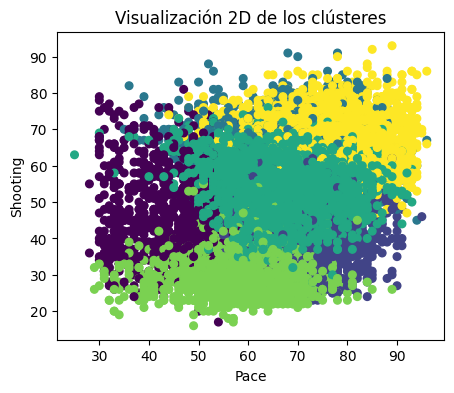

In [20]:
# Visualización 2D usando dos variables relevantes
plt.figure(figsize=(5, 4))
plt.scatter(
    data['pace'],
    data['shooting'],
    c=data['Cluster'].astype('category').cat.codes,
    s=30
)
plt.xlabel('Pace')
plt.ylabel('Shooting')
plt.title('Visualización 2D de los clústeres')
plt.show()

Se aprecia que los grupos presentan una separación razonable, especialmente entre jugadores más ofensivos y aquellos con perfiles menos orientados al ataque. En general, los grupos obtenidos parecen coherentes y permiten identificar patrones claros, por lo que el resultado del agrupamiento puede considerarse adecuado para un análisis exploratorio.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Realiza una visualización de los grupos obtenidos en 2D usando reducción de dimensionalidad diferente a PCA.
<ul>
  <li>¿Qué tan buenos te parecen los grupos?</li>
  <li>Indica el porcentaje de la variaza explicada en el gráfico, ¿afecta esto a tu visualización?</li>
</ul>
</div>

In [23]:
# Reducción de dimensionalidad con SVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X)

# DataFrame para la visualización
df_svd = pd.DataFrame(X_svd, columns=['Dim1', 'Dim2'])
df_svd['Cluster'] = data['Cluster'].values

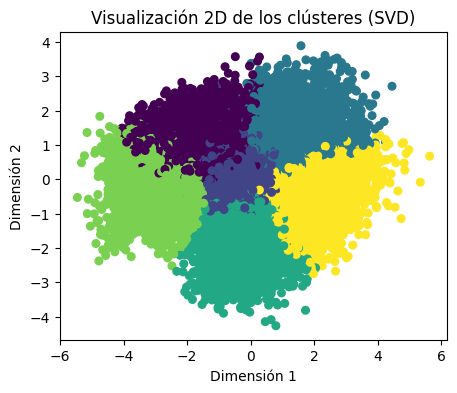

In [24]:
# Visualización 2D
plt.figure(figsize=(5, 4))
plt.scatter(
    df_svd['Dim1'],
    df_svd['Dim2'],
    c=df_svd['Cluster'].astype('category').cat.codes,
    s=30
)
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Visualización 2D de los clústeres (SVD)')
plt.show()


In [25]:
# Porcentaje de varianza explicada
svd.explained_variance_ratio_, svd.explained_variance_ratio_.sum()


(array([0.47218022, 0.28428255]), np.float64(0.756462764644714))

Al ver la visualización en dos dimensiones usando SVD, los grupos se distinguen de forma general, aunque en algunas zonas se mezclan un poco. Esto es normal, ya que al reducir los datos a solo dos dimensiones se pierde parte de la información original. Aun así, los clústeres mantienen cierta coherencia y permiten identificar patrones entre los jugadores. El porcentaje de varianza explicada no es muy alto, por lo que el gráfico no muestra toda la estructura del conjunto de datos, pero sí es útil para tener una idea general de cómo se distribuyen los grupos y cómo se relacionan entre sí.

---
## <font color='264CC7'> Métricas  </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula la métrica de la silueta para los grupos obtenidos. ¿Qué tan buenos te parecen los grupos?
</div>

In [28]:
# Métrica de la silueta
silhouette_avg = silhouette_score(X, labels)
silhouette_avg


np.float64(0.21926664435574628)

El valor de la métrica de la silueta indica que los grupos obtenidos tienen una calidad razonable, ya que existe cierta separación entre ellos y los elementos dentro de cada clúster son relativamente similares. Aunque no se trata de grupos perfectamente definidos, lo cual es normal en datos reales como este, el resultado sugiere que el agrupamiento captura patrones útiles y coherentes en los jugadores. En general, los clústeres pueden considerarse adecuados para un análisis exploratorio.